# P1 - LAB - Controle Digital - SEL0359

> Felipe Andrade Garcia Tommaselli- 11800910

In [134]:
A = 3.4 # 2.7
B = 97 # 28
Kp = 7
Ki = 2.5
Kd = 0.9
T = 0.075 # 0.069
R1 = 27 
L1 = 8 # mH
C1 = 10 # microF

global A, B, Kp, Ki, Kd, T, R1, L1, C1

In [135]:
# 1)
import numpy as np
import matplotlib.pyplot as plt

# 2)
from scipy import signal

# 3)
from control.matlab import tf, c2d



# 5)
from control import tf, rlocus, c2d, feedback, step_response, bode

1. Considere o sinal  
   $$y(t) = e^{-At} \cos(2\pi Bt)u(t).$$

(a) Mostre o sinal em tempo contínuo no intervalo [0, 5] para os valores de A e B conforme seu N° USP.

(b) Obtenha o espectro de frequência usando fft e defina um limite B de banda máxima para o sinal. Justifique a escolha desse limite de banda.

(c) Escolha uma frequência menor que 100Hz e faça a amostragem do sinal para obter $$y_a[k]$$. Em seguida, mostre o sinal amostrado juntamente com o sinal contínuo. Justifique a escolha da frequência de amostragem.

(d) Construa o sinal $$y_a^*(t)$$ (usando trem de impulsos) e mostre usando stem.

(e) Obtenha o espectro de $$y_a^*(t)$$ usando fft e mostre o espectro para $$f \in [-3f_s, 3f_s]$$. O que pode-se concluir com o espectro do sinal amostrado?


In [136]:
# Parte (a): Gerar o sinal em tempo contínuo y(t) no intervalo [0, 5]
t_start = 0
t_end = 5
num_points = 5000  # Número de pontos para um gráfico suave
t_continuous = np.linspace(t_start, t_end, num_points)  # Vetor de tempo

# Função degrau unitário u(t)
u_t = (t_continuous >= 0).astype(float)

# Sinal em tempo contínuo y(t)
y_t = np.exp(-A * t_continuous) * np.cos(2 * np.pi * B * t_continuous) * u_t

# Parte (b): Calcular o espectro de frequência usando FFT
N = len(y_t)  # Número de amostras
T = (t_end - t_start) / (N - 1)  # Intervalo de amostragem
fs = 1 / T  # Frequência de ams do sinal contínuo

# Calcular a FFT
Y_f = np.fft.fft(y_t)
freq = np.fft.fftfreq(N, d=T)

# Deslocar o componente de frequência zero para o centro
Y_f_shifted = np.fft.fftshift(Y_f)
freq_shifted = np.fft.fftshift(freq)

# Calcular o espectro de magnitude
magnitude_spectrum = np.abs(Y_f_shifted)

# Definir um limiar para determinar frequências significativas
threshold = max(magnitude_spectrum) * 0.05  # 5% da magnitude máxima

# Encontrar índices onde a magnitude excede o limiar
bandwidth_indices = np.where(magnitude_spectrum > threshold)[0]
B_limit_low = freq_shifted[bandwidth_indices[0]]
B_limit_high = freq_shifted[bandwidth_indices[-1]]
bandwidth = B_limit_high - B_limit_low

print(f"Limite de banda de {B_limit_low:.2f} Hz a {B_limit_high:.2f} Hz")
print(f"Largura de banda estimada: {bandwidth:.2f} Hz")

# Parte (c): Escolher uma frequência de amostragem fs_sample menor que 100 Hz
# Garantir que fs_sample > 2 * (B + A / (2 * pi)) para satisfazer o critério de Nyquist
# Aproximar o componente de frequência máxima
max_freq_component = B + A / (2 * np.pi)
fs_sample = min(100, 2 * max_freq_component * 1.2)  # Adicionar margem de 20%
T_sample = 1 / (5*fs_sample)
t_sampled = np.arange(t_start, t_end, T_sample)
u_sampled = (t_sampled >= 0).astype(float)
y_sampled = np.exp(-A * t_sampled) * np.cos(2 * np.pi * B * t_sampled) * u_sampled

print(f"Frequência de amostragem escolhida: {fs_sample:.2f} Hz")

# Parte (d): Construir y_a*(t) usando aprox por trem de impulsos
# Como não podemos representar impulsos numericamente, usaremos o sinal amostrado

# Parte (e): Calcular o espectro de y_a*(t) usando FFT
# Preencher com zeros o sinal amostrado para aumentar a resolução em frequência
N_fft = 4096
Y_sampled = np.fft.fft(y_sampled, n=N_fft)
freq_sampled = np.fft.fftfreq(N_fft, d=T_sample)

# Deslocar o componente de frequência zero para o centro
Y_sampled_shifted = np.fft.fftshift(Y_sampled)
freq_sampled_shifted = np.fft.fftshift(freq_sampled)


Limite de banda de -108.18 Hz a 108.18 Hz
Largura de banda estimada: 216.36 Hz
Frequência de amostragem escolhida: 100.00 Hz


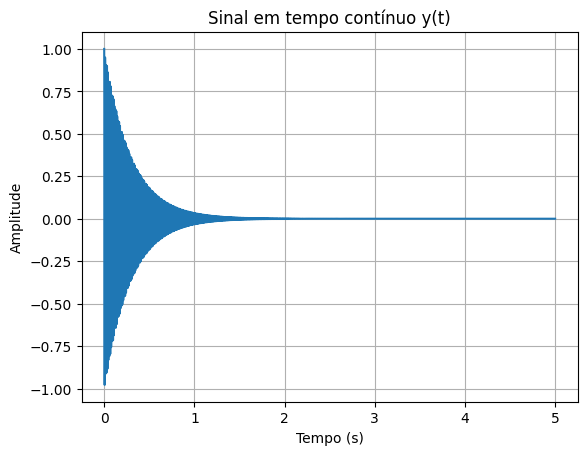

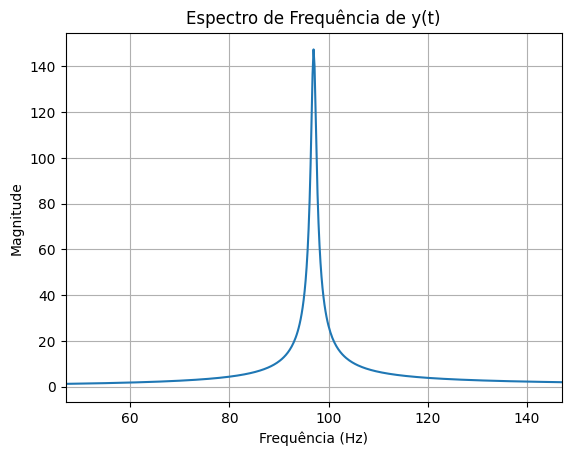

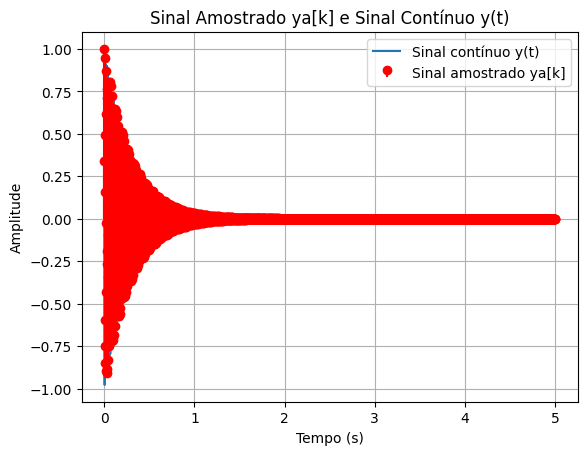

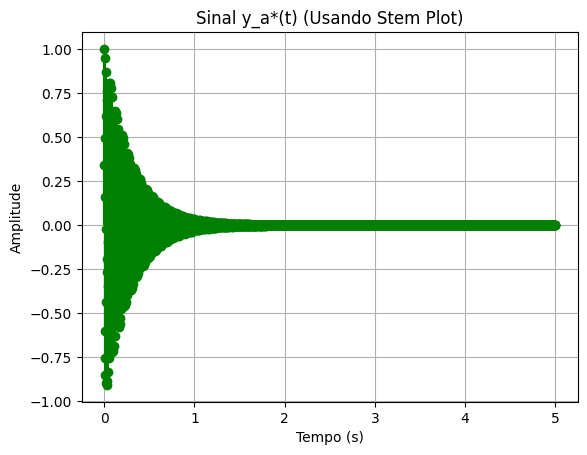

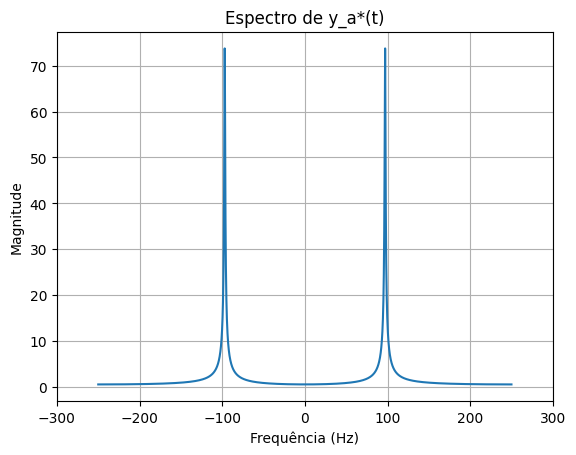

In [137]:
# PLot Parte (a): Sinal em tempo contínuo y(t)
plt.figure()
plt.plot(t_continuous, y_t)
plt.title('Sinal em tempo contínuo y(t)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# PLot Parte (b): Espectro de Frequência de y(t)
plt.figure()
plt.plot(freq_shifted, magnitude_spectrum)
plt.title('Espectro de Frequência de y(t)')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.xlim([B - 50, B + 50])  # Focar em torno do componente de ffrq principal
plt.grid(True)

# PLot Parte (c): Sinal amostrado ya[k] com sinal contínuo
plt.figure()
plt.plot(t_continuous, y_t, label='Sinal contínuo y(t)')
plt.stem(t_sampled, y_sampled, linefmt='r-', markerfmt='ro', basefmt=' ', label='Sinal amostrado ya[k]')
plt.title('Sinal Amostrado ya[k] e Sinal Contínuo y(t)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# PLot Parte (d): y_a*(t) usando gráfico de hastes (stem plot)
plt.figure()
plt.stem(t_sampled, y_sampled, linefmt='g-', markerfmt='go', basefmt=' ')
plt.title('Sinal y_a*(t) (Usando Stem Plot)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# PLot Parte (e): Espectro de y_a*(t)
plt.figure()
plt.plot(freq_sampled_shifted, np.abs(Y_sampled_shifted))
plt.title('Espectro de y_a*(t)')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.xlim([-3 * fs_sample, 3 * fs_sample])
plt.grid(True)

plt.show()

---

2. Encontre o sinal da seguinte transformada Z e mostre as primeiras 30 amostras usando o comando stem:  
   $$F(z) = \frac{(z^2 + z + 3)z}{z^5 - z^4 + \frac{57}{100}z^3 - \frac{119}{500}z^2 - \frac{39}{1000}}$$


In [138]:
# z^2 + z + 3) * z = z^3 + z^2 + 3z
num_coeffs = [1, 1, 3, 0]  # Coeficientes de z^3 a z^0

# z^5 - z^4 + (57/100)z^3 - (119/500)z^2 - (39/1000)
den_coeffs = [1, -1, 57/100, -119/500, 0, -39/1000]  # Coeficientes de z^5 a z^0

# Garantir que numerador e denominador tenham o mesmo comprimento, preenchendo com zeros se necessário
num_order = len(num_coeffs) - 1
den_order = len(den_coeffs) - 1

if num_order < den_order:
    num_coeffs = [0]*(den_order - num_order) + num_coeffs
elif den_order < num_order:
    den_coeffs = [0]*(num_order - den_order) + den_coeffs

system = signal.dlti(num_coeffs, den_coeffs, dt=1)

# Calcular a resposta ao impulso (transformada inversa de Z) para as primeiras 30 amostras
n_samples = 30
n = np.arange(n_samples)
t_out, f_n = signal.dimpulse(system, n=n_samples)

f_n = np.squeeze(f_n)


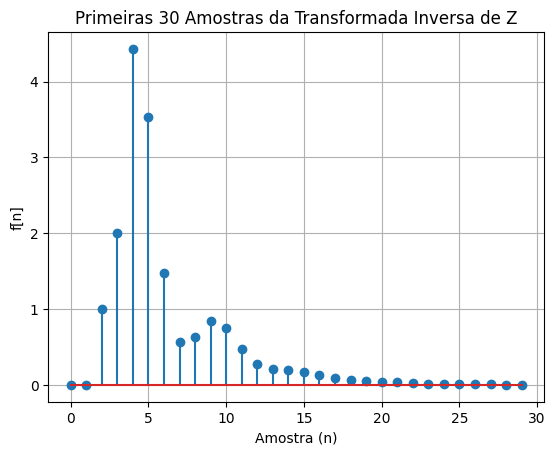

In [139]:
# Plotar as primeiras 30 amostras usando stem
plt.figure()
plt.stem(n, f_n)
plt.title('Primeiras 30 Amostras da Transformada Inversa de Z')
plt.xlabel('Amostra (n)')
plt.ylabel('f[n]')
plt.grid(True)
plt.show()

---

3. Encontre a resposta temporal (em tempo discreto) do controlador PID a seguir para um erro em degrau unitário usando um método de discretização de sua escolha e valores de ---KP---, ---KI--- e ---KD--- conforme seu N° USP:  
   $$C(s) = \frac{U(s)}{E(s)} = K_P + K_I \frac{1}{s} + K_D s.$$


In [140]:
# Discretization using Tustin's method (bilinear transformation)

# Compute intermediate constants
T_div_2 = T / 2          # T/2
Two_div_T = 2 / T        # 2/T

# Compute Kd_term and Ki_term
Kd_term = Kd * Two_div_T     # Kd * (2/T)
Ki_term = Ki * T_div_2       # Ki * (T/2)

# Define numerator coefficients for each term

# Kp term: Kp * (z^2 - 1)
Kp_num = Kp * np.array([1, 0, -1])  # Coefficients for z^2, z^1, z^0

# Kd term: Kd_term * (z - 1)^2
Kd_num = Kd_term * np.array([1, -2, 1])  # Coefficients for z^2, z^1, z^0

# Ki term: Ki_term * (z + 1)^2
Ki_num = Ki_term * np.array([1, 2, 1])  # Coefficients for z^2, z^1, z^0

# Sum the numerator coefficients
num_coeffs = Kp_num + Kd_num + Ki_num

# Denominator coefficients: (z^2 - 1)
den_coeffs = np.array([1, 0, -1])

# Define the discrete-time transfer function C(z)
Cz = tf(num_coeffs, den_coeffs, T)

# Define time vector for simulation (simulate for 5 seconds)
time = np.arange(0, 5 + T, T)  # Add T to include the last point

# Compute the step response of the controller
t_out, y_out = step(Cz, time)


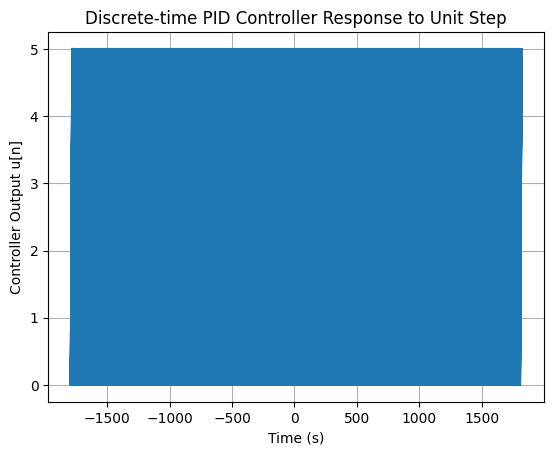

In [141]:
# Plot the step response
plt.figure()
plt.step(t_out, y_out, where='post')
plt.title('Discrete-time PID Controller Response to Unit Step')
plt.xlabel('Time (s)')
plt.ylabel('Controller Output u[n]')
plt.grid(True)
plt.show()


---

4. Considere o circuito RLC apresentado na Figura 1

![Figura 1: Circuito RLC.](RLC_circuit.png)

(a) Obtenha a função de transferência para o circuito RLC $$G(s) = \frac{V_o(s)}{V_i(s)}$$;

(b) Discretize a função de transferência $$G(s)$$ usando o método de Tustin com período de amostragem ---T--- e parâmetros ---R_1---, ---L_1--- e ---C_1--- conforme seu n° USP.

(c) Compare a resposta ao degrau do sistema contínuo e discreto;

(d) Compare a resposta ao impulso do sistema contínuo e discreto;

(e) Compare a resposta em frequência do sistema contínuo e discreto;

(f) Usando a FT discretizada $$G_d(z)$$ obtenha a respectiva equação às diferenças.


In [142]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from control.matlab import tf, c2d, step, impulse, bode
from scipy.signal import dlti, dlsim

# Given parameters
R1 = 27           # Ohms
L1 = 8e-3         # Henries (8 mH)
C1 = 10e-6        # Farads (10 μF)
T = 0.069         # Sampling period in seconds

# Part (a): Obtain the transfer function G(s) = Vo(s)/Vi(s)

# Continuous-time transfer function G(s) = 1 / (L*C*s^2 + R*C*s + 1)
LC = L1 * C1
RC = R1 * C1

# Denominator coefficients [L*C, R*C, 1] corresponding to s^2, s^1, s^0
num_Gs = [1]  # Numerator is 1 (since it's 1 in the numerator)
den_Gs = [LC, RC, 1]

# Create the continuous-time transfer function G(s)
Gs = tf(num_Gs, den_Gs)

# Part (b): Discretize G(s) using Tustin's method with sampling period T
Gd = c2d(Gs, T, method='tustin')

# Extract numerator and denominator coefficients of Gd(z)
num_Gd = Gd.num[0][0]
den_Gd = Gd.den[0][0]

# Part (c): Compare step response of continuous and discrete systems

# Time vector for simulation (0 to 0.7 seconds)
t_end = 0.7
t_continuous = np.linspace(0, t_end, 1000)      # Continuous time vector
t_discrete = np.arange(0, t_end + T, T)         # Discrete time vector with steps of T

# Compute step responses
t_step_cont, y_step_cont = step(Gs, T=t_continuous)
t_step_disc, y_step_disc = step(Gd, T=t_discrete)

# Part (d): Compare impulse response of continuous and discrete systems

# Compute impulse responses
t_impulse_cont, y_impulse_cont = impulse(Gs, T=t_continuous)
t_impulse_disc, y_impulse_disc = impulse(Gd, T=t_discrete)

# Part (e): Compare frequency response of continuous and discrete systems

# Frequency range for Bode plot
w = np.logspace(1, 6, 1000)  # Frequencies from 10^1 to 10^6 rad/s

# Compute Bode plots
mag_cont, phase_cont, omega_cont = bode(Gs, w, Plot=False)
mag_disc, phase_disc, omega_disc = bode(Gd, w, Plot=False)

# Part (f): Obtain the difference equation from Gd(z)

# Normalize coefficients (if necessary)
a0 = den_Gd[0]
num_Gd_normalized = num_Gd / a0
den_Gd_normalized = den_Gd / a0

# Extract coefficients for the difference equation
b = num_Gd_normalized
a = den_Gd_normalized

# Display the difference equation coefficients
print("Difference equation coefficients:")
print(f"Numerator coefficients (b): {b}")
print(f"Denominator coefficients (a): {a}")


Difference equation coefficients:
Numerator coefficients (b): [0.99216852 1.98433703 0.99216852]
Denominator coefficients (a): [1.         1.98420366 0.98447041]


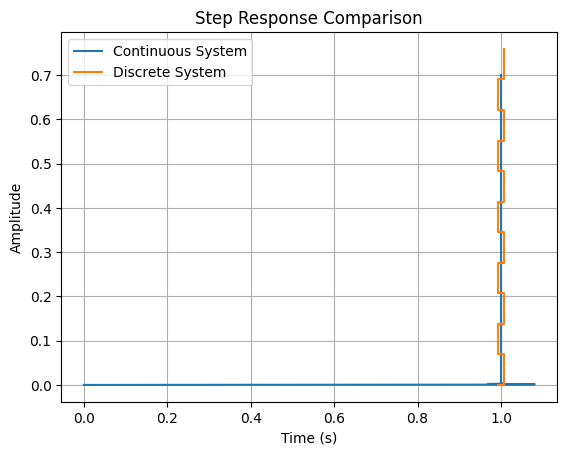

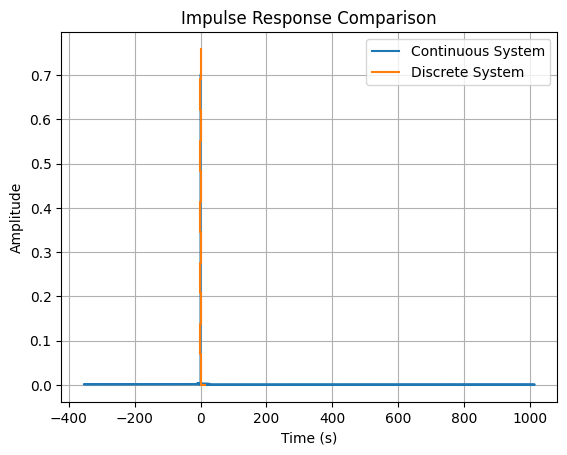

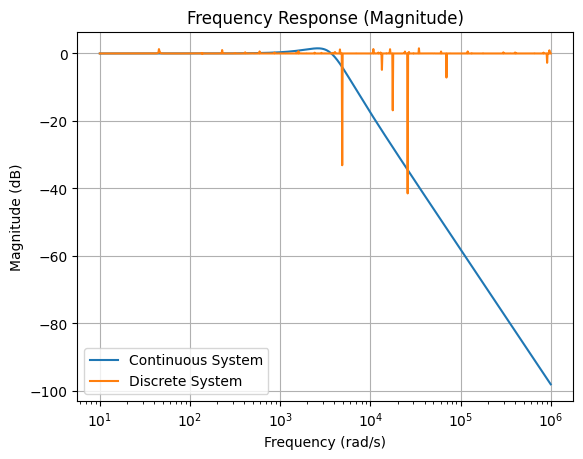

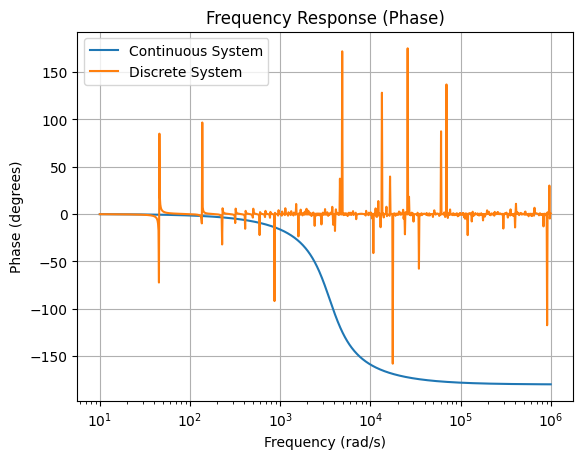

In [143]:
# Part (c): Plot step responses
plt.figure()
plt.plot(t_step_cont, y_step_cont, label='Continuous System')
plt.step(t_step_disc, y_step_disc, where='post', label='Discrete System')
plt.title('Step Response Comparison')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# Part (d): Plot impulse responses
plt.figure()
plt.plot(t_impulse_cont, y_impulse_cont, label='Continuous System')
plt.step(t_impulse_disc, y_impulse_disc, where='post', label='Discrete System')
plt.title('Impulse Response Comparison')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# Part (e): Plot frequency responses (Bode plots)

# Plot magnitude response
plt.figure()
plt.semilogx(omega_cont, 20 * np.log10(mag_cont), label='Continuous System')
plt.semilogx(omega_disc, 20 * np.log10(mag_disc), label='Discrete System')
plt.title('Frequency Response (Magnitude)')
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.grid(True)

# Plot phase response
plt.figure()
plt.semilogx(omega_cont, phase_cont * (180 / np.pi), label='Continuous System')
plt.semilogx(omega_disc, phase_disc * (180 / np.pi), label='Discrete System')
plt.title('Frequency Response (Phase)')
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Phase (degrees)')
plt.legend()
plt.grid(True)

# Show all plots
plt.show()


---

5. A dinâmica de atitude e translação de um quadricóptero é, usualmente, controlada através de motores do tipo brushless. Esses motores são controlados via uma entrada ---PWM--- de um microcontrolador. De forma simplificada, a dinâmica de um motor brushless obedece a seguinte função de transferência:  
   $$G(s) = \frac{Y(s)}{U(s)} = \frac{3.3928s^2 - 340.09s + 39451}{s^3 + 74.38s^2 + 5589s + 42107}$$  
   em que ---Y(s)--- é a velocidade de rotação do motor e ---U(s)--- é o sinal de entrada.

![Figura 2: Quadricóptero.](quadricopter.png)

(a) Obtenha o Lugar geométrico das raízes de $$G(s)$$.

(b) Obtenha a faixa de ganho para os quais é possível controlar em tempo contínuo e de forma estável, usando um controle proporcional, o motor brushless representado por $$G(s)$$.

(c) Faça a discretização da FT do motor brushless com ---T = 0.05s--- usando método degrau-invariante e apresente o Lugar Geométrico das Raízes do modelo discretizado.

(d) Obtenha a faixa de ganho para os quais é possível controlar em tempo discreto e de forma estável, usando um controle proporcional, o motor brushless. A margem de ganho aumentou ou diminuiu? Justifique.

(e) Escolha um ganho estável e apresente um comparativo da resposta ao degrau do motor brushless em tempo contínuo com a versão discretizada (usando o mesmo ganho). O que pode-se concluir em relação ao transitório do sistema discretizado?


In [144]:
# Parte (a): Obter o lugar das raízes de G(s)

# Definir a função de transferência em tempo contínuo G(s)
# Coeficientes do numerador: 3.3928s^2 - 340.09s + 39451
num_Gs = [3.3928, -340.09, 39451]

# Coeficientes do denominador: s^3 + 74.38s^2 + 5589s + 42107
den_Gs = [1, 74.38, 5589, 42107]

# Criar a função de transferência G(s)
Gs = tf(num_Gs, den_Gs)

# Parte (b): Obter a faixa de ganho para controle estável usando controle proporcional em tempo contínuo
# Isso será analisado usando o lugar das raízes na Parte (a)

# Parte (c): Discretizar G(s) usando o método invariante por degrau (Zero-Order Hold) com T = 0.05 s
T = 0.05  # Período de amostragem

# Discretizar G(s) usando o método Zero-Order Hold
Gd = c2d(Gs, T, method='zoh')

# Parte (d): Obter a faixa de ganho para controle estável usando controle proporcional em tempo discreto
# Isso será analisado usando o lugar das raízes de Gd(z) na Parte (c)

# Parte (e): Escolher um ganho estável e comparar as respostas ao degrau dos sistemas contínuo e discreto

# A partir da análise do lugar das raízes, vamos escolher um ganho K dentro da faixa estável
K = 0.1

# Sistemas em malha fechada
# Sistema em malha fechada em tempo contínuo
Gs_cl = feedback(K * Gs, 1)

# Sistema em malha fechada em tempo discreto
Gd_cl = feedback(K * Gd, 1)

# Vetores de tempo para simulação
t_continuous = np.linspace(0, 1, 1000)
t_discrete = np.arange(0, 1 + T, T)

# Calcular as respostas ao degrau
t_step_cont, y_step_cont = step_response(Gs_cl, T=t_continuous)
t_step_disc, y_step_disc = step_response(Gd_cl, T=t_discrete)


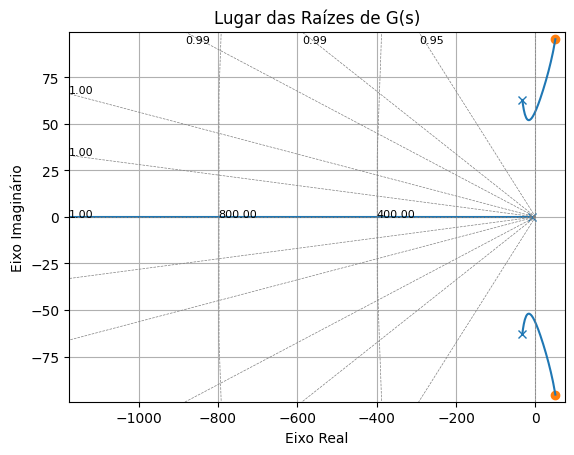

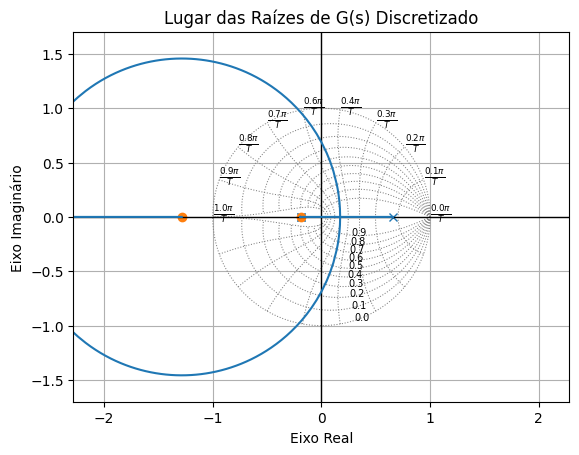

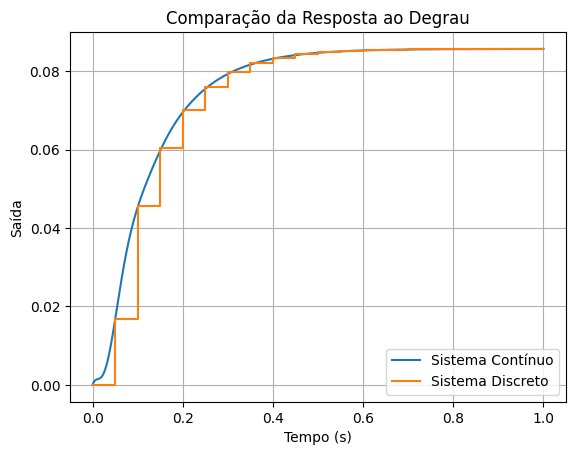

In [145]:
# Parte (a): Plotar o lugar das raízes de G(s)
plt.figure()
rlocus(Gs)
plt.title('Lugar das Raízes de G(s)')
plt.xlabel('Eixo Real')
plt.ylabel('Eixo Imaginário')
plt.grid(True)

# Parte (c): Plotar o lugar das raízes do Gd(z) discretizado
plt.figure()
rlocus(Gd)
plt.xlim([-1.7, 1.7])
plt.ylim([-1.7, 1.7])
plt.title('Lugar das Raízes de G(s) Discretizado')
plt.xlabel('Eixo Real')
plt.ylabel('Eixo Imaginário')
plt.grid(True)

# Parte (e): Plotar as respostas ao degrau dos sistemas contínuo e discreto
plt.figure()
plt.plot(t_step_cont, y_step_cont, label='Sistema Contínuo')
plt.step(t_step_disc, y_step_disc, where='post', label='Sistema Discreto')
plt.title('Comparação da Resposta ao Degrau')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída')
plt.legend()
plt.grid(True)

# Mostrar todos os gráficos
plt.show()
